# Intertemporal Choice

We will consider a simple two-period model

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

Income in two periods given by $y_0$ and $y_1$ while the discount factor is given by $\delta$. Utility has a known form: 

$$ u(C) = \frac{C^{1-\tfrac{1}{\sigma}}-1}{1-\tfrac{1}{\sigma}} $$

We will see that $\sigma$ is the intertemporal elasticity of substitution. 

In [2]:
y0 = 50e3
y1 = 25e3
delta = 0.95
sigma = 2.0
r = 0.03

Utility function and marginal utility

In [3]:
def u(cons, sigma):
  if sigma!=1.0:
    return (cons**(1.0-1/sigma)-1.0)/(1-1/sigma)
  else :
    return np.log(cons)

def mu(cons,sigma):
  if sigma!=1.0:
    return cons**(-1/sigma)
  else :
    return 1/cons

Discounted utility using the intertemporal budget constraint

In [4]:
def Du(cons,delta,sigma,y0,y1,r):
  return u(cons,sigma) + delta*u((1+r)*(y0-cons)+y1,sigma)

Check out how this function behaves as a function of $C_1$. 

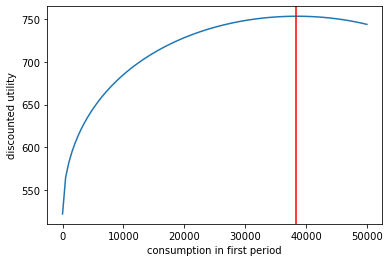

In [5]:
gridc = np.linspace(0.1,y0-0.1,100)
plt.figure()
Dus = [Du(c,delta,sigma,y0,y1,r) for c in gridc]
iopt = np.argmax(Dus)
copt = gridc[iopt]
plt.plot(gridc,Dus)
plt.axvline(x=copt,color='r')
plt.xlabel('consumption in first period')
plt.ylabel('discounted utility')
plt.show()

## Solving the Euler equation

To find optimal consumption we need to solve: 

$$ u'(C_0) = R\delta u'((1+r)(y_0-C_0)+y_1) $$ 



In [6]:
from scipy.optimize import bisect

In [7]:
def euler(cons,delta,sigma,y0,y1,r):
    mu1 = mu(cons,sigma)
    mu2 = mu((1+r)*(y0-cons)+y1,sigma)
    return mu1 - (1+r)*delta*mu2

In [8]:
euler(39e3,delta,sigma,y0,y1,r)

-6.99753269455955e-05

In [9]:
copt = bisect(euler,y0*0.01,0.99*y0,args=(delta,sigma,y0,y1,r))
copt 

38491.2971302977

In [10]:
sopt = y0 - copt
sopt

11508.702869702298

## Change in the Interest Rate

The Euler equation is 
$$ u'(C_0) = R\delta u'(C_1) $$ 

Taking the log of both sides of the Euler equation and taking a first derivative we get:

$$ \frac{\partial{\log (C_1/C_0)}}{\partial{\log r}} = \sigma $$ 

How consumption changes as a function of the interest rate is a function of $\sigma$. The intertemporal elasticity of substitution (IES) governs the subtitution when $r$ change. When $r$ increases, the intertemporal substitution effect is to increase second period consumption relative to first period consumption (increase $C_1$ relative to $C_0$). But there is also an income effect. An increase in $r$ increases the discounted value of income over the two periods. This increases $C_0$ and $C_1$. The total effect is indeterminate and therefore we cannot sign either the effect of an increase in the interest rate on savings. 

In [11]:
def optsave(delta,sigma,y0,y1,r):
  copt = bisect(euler,y0*0.01,0.99*y0,args=(delta,sigma,y0,y1,r))
  return y0 - copt

In [12]:
rs = np.linspace(0.01,0.1,100)
saves = [optsave(delta,sigma,y0,y1,r) for r in rs]

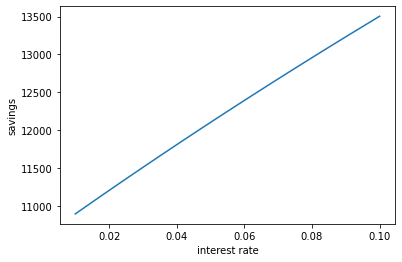

In [13]:
plt.figure()
plt.plot(rs,saves)
plt.xlabel('interest rate')
plt.ylabel('savings')
plt.show()

For different values of $\sigma$. 

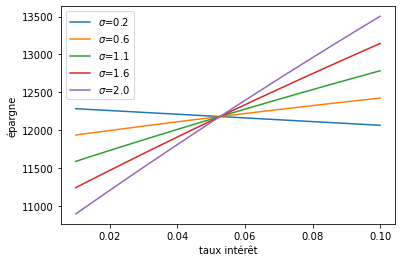

In [14]:
sigmas = np.linspace(0.2,2.0,5)
plt.figure()
for s in sigmas:
  saves = [optsave(delta,s,y0,y1,r) for r in rs]
  plt.plot(rs,saves,label='$\sigma$='+str(np.round(s,1)))
plt.xlabel('taux intérêt')
plt.ylabel('épargne')
plt.legend()
plt.show()

The higher is the IES, the more positive is the response to the interest rate. A tax discourages savings when $\sigma$ is large and encourages savings when $\sigma$ is small. 